# **Tercer Proyecto: Analisis exploratorio de un dataset**
 
En este proyecto deberán seleccionar un conjunto de datos de su interés, con cualquiera de las fuentes de datos mostradas o alguna otra fuente de datos, incluso valen datos recolectados por ustedes. Deberan explorar los datos con el finde hacer una pregunta que puedan responder usando algoritmos de aprendizaje automático.

# Tema que van a abordar
Describe la temática de tu proyecto y porque la elegiste.

**La temática de mi proyecto se basa en un dataset, el cual contiene los datos de más de 20.000 partidas que se realizaron de forma online en la página web de ajedrez llamada "Lichess.com". Elegí éste tema porque me resultó interesante a la hora de analizar sus variables y los datos que contiene.**

# Definición del problema
 
¿Cuál es la pregunta que queremos resolver? Es importante que la misma sea lo más específica posible para usar la misma como guía. Es muy fácil perder el foco y terminar generando otra respuesta.  
 
También es de valor un poco de contexto sobre la pregunta ¿cómo surgió? ¿Por qué escogiste esa pregunta?

**El problema que planteé es el siguiente: ¿Es verdad que gran parte de los rivales quienes se enfrentan a jugadores con altos puntajes tienden a rendirse cuando la partida está prácticamente perdida? Decidí utilizar ésta cuestión como guía ya que me pareció una buena idea para trabajar con la ayuda de las variables del Dataset.**

# Búsqueda de datos
 
¿Qué datos usarás para resolver tu pregunta? En esta sección se deben de describir los mismos, no desde un punto de vista de análisis exploratorio, sino más enfocado en la búsqueda ¿Cómo los conseguiste? ¿Por qué esos datos? ¿Qué información tienen y cual crees que te haga falta o qué podría agregar valor?

**Los datos que usaré para resolver mi pregunta son:**

**1.   El puntaje del jugador con piezas blancas.**

**3.   La cantidad de movimientos en la apertura del juego.**

**4.   El color de las piezas que resultaron victoriosas.**

**6.   El código de apertura de las blancas.**

**7.   La apertura de las negras.**

**7.   El puntaje del jugador con piezas negras.**

**9.   El estado de victoria (jaque-mate, rendición o tiempo agotado)**

**10.  La sumatoria total de la cantidad de turnos de ambos jugadores durante el transcurso de la partida.**


**Estos datos los conseguí, en parte, por el Dataset original de _chess_games_, y los consideré necesarios porque puede llegar a haber una relación entre ellas la cual facilite la resolución de mi pregunta.**

# Presentación de las variables del _dataset_
Describe las variables que componen tu dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import io
files.upload()

In [ ]:
chess = pd.read_csv("chess_games.csv")
chess

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense,NaN,NaN


Las variables que componen el dataset son:

1.   **game_id**: Es la Id del juego, el número de partida.
2.   **rated**: Nos dice si la partida fue calificada (True) o no (False).
3.   **turns**: La sumatoria total de turnos entre cada jugador.
4.   **victory_status**: Explica como fue la victoria del ganador (por jaque-mate, por falta de tiempo o rendición del rival)
5.   **winner**: Ganador del juego (color de las piezas)
6.   **time_increment**: Duración de la partida, sumando los tiempos de incremento.
7.   **white_id**: Nombre del jugador con piezas blancas.
8.   **white_rating**: Puntaje del jugador con piezas blancas.
9.   **black_id**: Nombre del jugador con piezas negras.
10.  **black_rating**: Puntaje del jugador con piezas negras.
11.  **moves**: Menciona los movimientos que realizaron ambos jugadores durante el transcurso de la partida.
12.  **opening_code**: Código de los movimientos de apertura en el juego.
13.  **opening_moves**: La cantidad de movimientos realizados en la apertura.
14.  **opening_fullname**: Nombre completo de la apertura.
15.  **opening_shortname**: Nombre abreviado de la apertura.
16.  **opening_response**: Apertura "respuesta" por parte del jugador con piezas negras.
17.  **opening_variation**: Nombre del conjunto de movimientos llamado _variante_ luego de realizar la apertura.

# Hipótesis inicial
Formula una hipótesis inicial de cómo crees que influenciarán las distintas variables de tu dataset para responder tu pregunta.

**Mi hipótesis inicial es que hay algunas variables que están mejor relacionadas entre ellas y me permitirán responder mi pregunta lo mejor posible. Dichas variables son las que mencioné en un principio (en la _búsqueda de datos_).**

# Análisis exploratorio
 
Explora un poco tus datos, hazte algunas preguntas extras que te puedan dar claridad sobre el comportamiento de los datos y que puedan ayudarte a entender mejor el problema o el comportamiento del caso a estudiar. Debes hacerte varias preguntas (al menos 3 para el proyecto) y responderlas con gráficos. 

**Preguntas extras: ¿Qué tan relacionadas están las variables entre sí? ¿Qué tipo de datos son? ¿Cuántos datos son nulos? ¿Como serían los gráficos de las variables que seleccioné anteriormente? ¿Cuáles son las aperturas más utilizadas? ¿Qué tipo de victoria es más usual? ¿Cuál es el porcentaje de victorias de las piezas blancas? ¿Y de las negras?**

**Para responder a mis preguntas, me basaré, en parte, en cuatro códigos que son muy necesarios a la hora de realizar un análisis exploratorio.**

**1)   .describe() = Explica los datos que compone cada variable numérica del dataset. Por ejemplo, la cantidad de valores que posee, el valor medio, máximo, mínimo, la desviación estándar, etc.**

**2)   .info() = Informa sobre los tipos de datos de cada variable y la cantidad de no nulos.**

**3)   .corr() = Muestra una tabla con la correlación que posee cada variable númerica con respecto a otra.**

**4)   .pairplot(data, hue) = Realiza los gráficos de todas las columnas con variables numéricas del dataset.**

In [ ]:
chess.describe()

,game_id,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,10029.500000,60.465999,1596.631868,1588.831987,4.816981
std,5790.390185,33.570585,291.253376,291.036126,2.797152
min,1.000000,1.000000,784.000000,789.000000,1.000000
25%,5015.250000,37.000000,1398.000000,1391.000000,3.000000
50%,10029.500000,55.000000,1567.000000,1562.000000,4.000000
75%,15043.750000,79.000000,1793.000000,1784.000000,6.000000
max,20058.000000,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
# Los tipos de variables y cantidad de non-null (no-nulos)
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

**Con los siguientes códigos, podré responder a mi pregunta de que tan relacionadas están las variables entre sí.**

In [ ]:
chess.corr()

,game_id,rated,turns,white_rating,black_rating,opening_moves
game_id,1.000000,0.034228,0.049888,0.118444,0.119555,0.054140
rated,0.034228,1.000000,0.090698,0.003284,0.032655,-0.001906
turns,0.049888,0.090698,1.000000,0.129753,0.160467,0.055999
white_rating,0.118444,0.003284,0.129753,1.000000,0.634171,0.277379
black_rating,0.119555,0.032655,0.160467,0.634171,1.000000,0.255396
opening_moves,0.054140,-0.001906,0.055999,0.277379,0.255396,1.000000


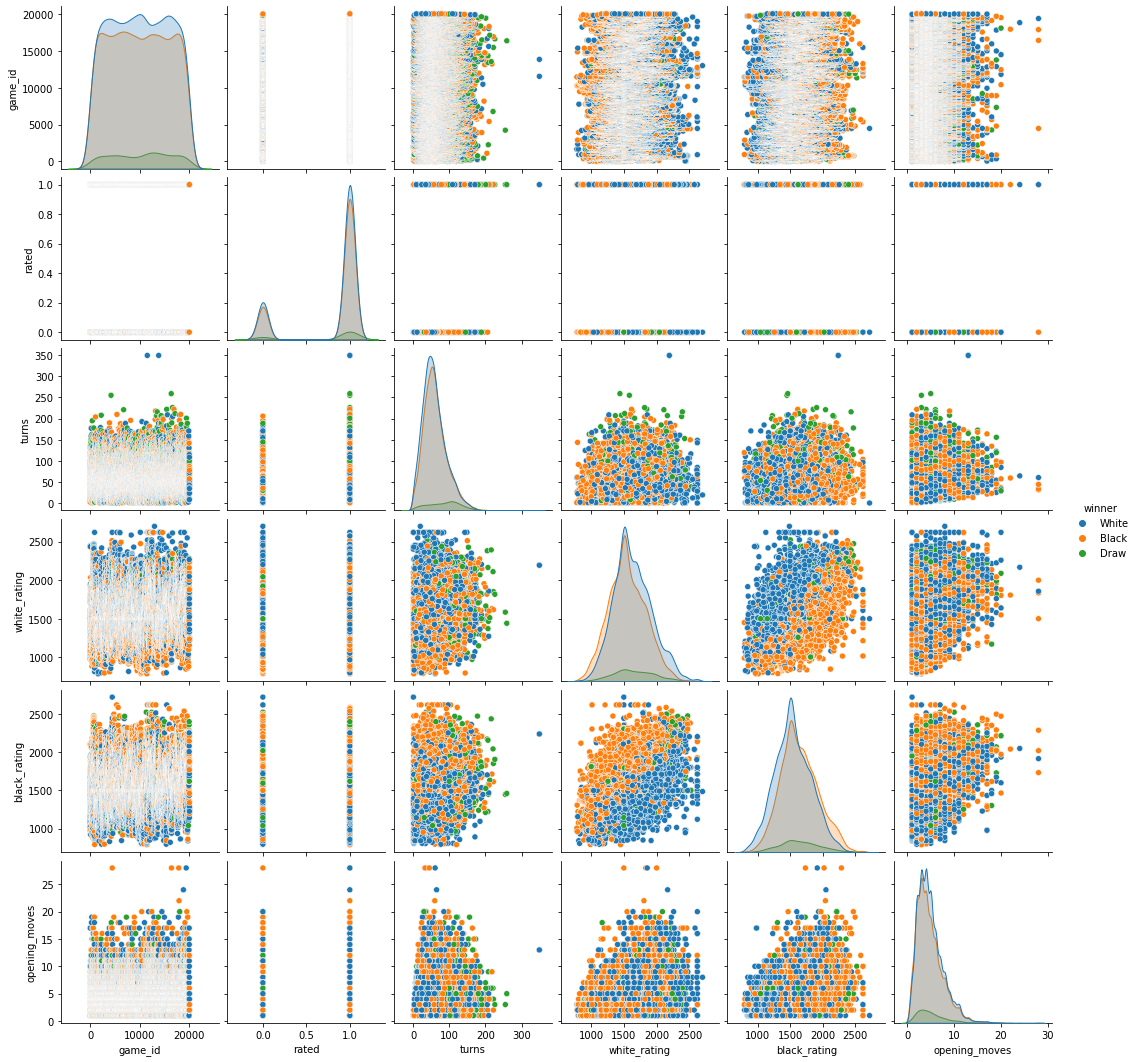

In [ ]:
# Gráficos de todas las variables numéricas
sns.pairplot(data=chess, hue="winner")

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**


**A continuación, realizo los gráficos de las variables clave que elegí.**

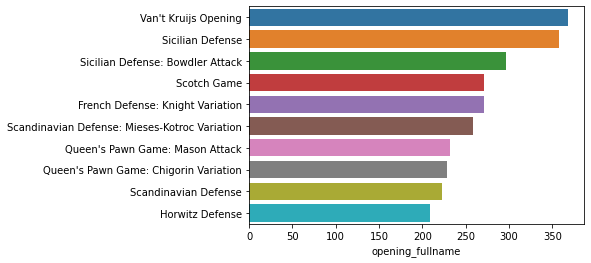

In [ ]:
# Una de las preguntas que realicé fue ésta: ¿Cuáles son las
# aperturas más utilizadas por parte de los jugadores con
# piezas blancas? Para responderla, primero creo
# una nueva variable (aperturas) que contiene la cantidad total 
# de aperturas hechas en todas las partidas que compone mi dataset. 
aperturas = chess.opening_fullname.value_counts()

# Ahora grafico las 10 aperturas más efectuadas.
sns.barplot(x = aperturas[:10], y = aperturas.index[:10])

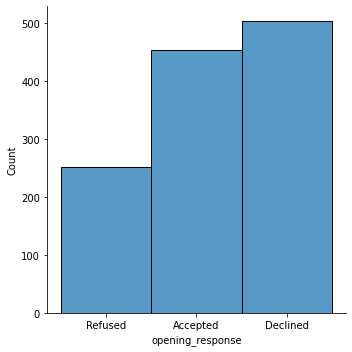

In [ ]:
# Gráfico de las aperturas respuesta por parte
# de las negras.
sns.displot(chess.opening_response)

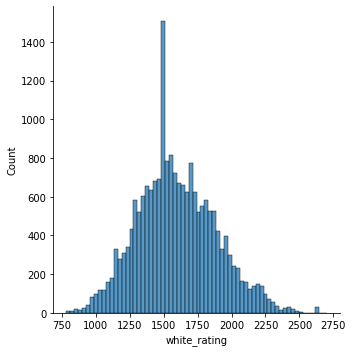

In [ ]:
# Gráfico de white_rating. La cantidad de jugadores blancos con
# sus respectivos puntajes.
sns.displot(chess.white_rating)

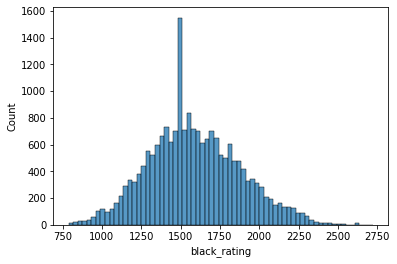

In [ ]:
# Gráfico del puntaje de los jugadores negros.
sns.histplot(chess.black_rating)

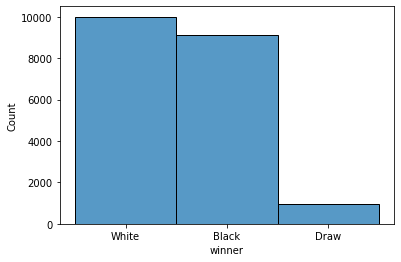

In [ ]:
# Gráfico de los ganadores / empates.
sns.histplot(chess.winner)

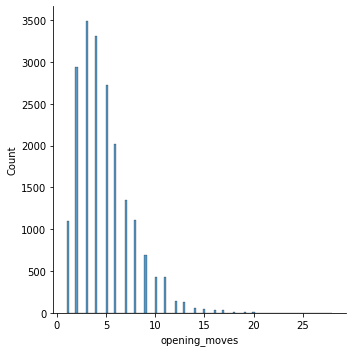

In [ ]:
# Gráfico de los movimientos de apertura más frecuentes en partidas
sns.displot(chess.opening_moves)

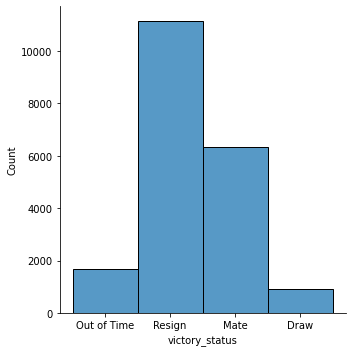

In [ ]:
# Gráfico de los estados de victorias
sns.displot(chess.victory_status)

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Por último, para resolver las otras dos preguntas que quedaron pendientes, en primer lugar creo una variable llamada "victorias" la cual es un dataframe que contiene el número de partidas ganadas por parte de las piezas blancas y de las negras, además de los empates.**

In [ ]:
victorias = pd.DataFrame(chess.winner.value_counts().reset_index())
victorias = victorias.rename(columns = {"index":"winner", "winner":"wins"})
victorias

,winner,wins
0,White,10001
1,Black,9107
2,Draw,950


**Luego, en el siguiente código expreso los porcentajes de cada ítem de la columna winner (White, Black y Draw)**

In [ ]:
print(chess.winner.value_counts() / chess.shape[0])

White    0.498604
Black    0.454033
Draw     0.047363
Name: winner, dtype: float64


**Podemos ver que el porcentaje de partidas ganadas por parte de las blancas es de un 49,86% y de las negras 45,40%. Para representarlo visualmente, realizo un gráfico de torta desde la librería _plotly.express_. Dicha librería es semejante a matplot.lyb, permite hacer distintos gráficos tales como de barras, histograma, de linea o de puntos. Preferí utilizar _px_ debido a que tuve problemas al intentar crear un gráfico de ese estilo con otras librerías.**

In [ ]:
px.pie(victorias, names="winner", values="wins")

# Limpieza del _dataset_

En esta etapa limpiamos los datos según lo aprendido en el módulo 2. Recuerda que para cada variable debes definir las cualidades que debe tener, evaluar si las cumple y, en caso que no, tomar una decisión sobre qué hacer en los casos que no se cumplan las cualidades necesarias. 

**Empiezo imputando los datos nulos de cada variable. Primero utilizo el método *isna()* para ubicar dichos datos.**

In [ ]:
chess.isna().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

**Se puede apreciar que las únicas variables que contienen datos nulos son "opening_responde" y "opening variation". Para poder tratarlos, utilicé un método práctico llamado "fillna" el cual sustituye los valores nulos por otros que no lo son:**

**1.   Pueden sustituirse por un valor concreto (0).** 

**2.   Puede utilizarse el anterior o posterior valor no nulo.**

**En éste caso decidí llevar a cabo la 2da opción ya que los valores de las variables son textos. Para ello, le especifiqué que sean empleados otros métodos denominados "ffill" (_forward fill_, los nulos copian el valor no-nulo anterior) y "bfill" (_backward fill_, los nulos son rellenados con el valor no-nulo posterior).**

In [ ]:
chess = chess.fillna(method = "ffill")
chess = chess.fillna(method = "bfill")

**Por último, verificamos de que los datos nulos hayan sido anulados.**

In [ ]:
chess.isna().sum()

game_id              0
rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_fullname     0
opening_shortname    0
opening_response     0
opening_variation    0
dtype: int64

**Para finalizar con la limpieza de datos, voy a pasar las variables categóricas que consideré como importantes a numéricas (winner, opening_code y opening_response). Ésto es para no tener problemas más adelante con los modelos. Lo hago con una función llamada _OneHotEncoder_ la cual facilita el proceso, dividiendo la variable que le señale por la cantidad de valores que posee y mediante 1 (True) y 0 (False) me dice que valor se llevó a cabo.**

**Un ejemplo:**       

winner_black | winner_white | winner_draw
-------------|--------------|------------
0 | 1 | 0
1 | 0 | 0
0 | 0 | 1

In [ ]:
# OneHotEncoder en winner
def oneHotEncoder(column, prefix):
  oneHot = pd.DataFrame()
  
  for value in column.unique():
    oneHot[prefix + value] = (column == value).astype("int")
 
  return oneHot
 
chess = chess.join(oneHotEncoder(chess.winner, "winner_"))
chess = chess.drop(columns="winner")

In [ ]:
# OneHotEncoder en opening_response
def oneHotEncoder(column, prefix):
  oneHot = pd.DataFrame()
  
  for value in column.unique():
    oneHot[prefix + value] = (column == value).astype("int")
 
  return oneHot
 
chess = chess.join(oneHotEncoder(chess.opening_response, "opening_response_"))

**En el caso de opening_code no es recomendable utilizar OneHotEncoder, por lo que la codificaré utilizando la funcion "opening_codeEncoder", la cual recibe como parámetro una observación de la variable opening_code, si esta es un dato nulo regresa 0, si no regresa el valor de apertura codificado.**

In [ ]:
from string import ascii_uppercase as letters
letters = dict(zip(list(letters),list(range(26))))
 
def opening_codeEncoder(opening_code):

  if opening_code is None or opening_code != opening_code:
    return 25000

  opening_code = opening_code.split(" ")

  value = 0
  for c in opening_code:
    value += (letters[c[0]] * 1000) + (int(c[1:]) if len(c) > 1 else 0)
  return value / len(opening_code)
 
chess.opening_code = chess.opening_code.apply(opening_codeEncoder)

----------------------------------------------------------------------------------------------------

*****

# **Cuarto Proyecto: Entrenamiento y prueba de modelos**
 
Este proyecto es una continuación del proyecto del módulo 3, donde deberán responder las preguntas planteadas en el proyecto anterior, y exponer sus resultados. 

# Separación de entrenamiento y validación
 
Este paso es vital para probar el modelo. También debes de recordar, que en el caso de que quieras crear alguna variable extra o transformación al conjunto de datos (PCA por ejemplo) a usar en el entrenamiento, debes de hacer todos los cálculos sólo con el conjunto de entrenamiento, por lo que es probable que debas regresar al análisis exploratorio una vez realizada la división. Estos pasos los explicamos de una forma lineal, pero realmente los proyectos reales son iterativos y tienen mucho de ir y venir.

**En primer lugar, elimino las columnas del dataset que no me serán de utilidad para efectuar el modelo.**

In [ ]:
chess = chess.drop(columns = ["game_id", "rated", "white_id", "black_id", "moves", "time_increment", "opening_fullname", "opening_shortname", "opening_variation", "opening_response"])
chess.head()

,turns,victory_status,white_rating,black_rating,opening_code,opening_moves,winner_White,winner_Black,winner_Draw,opening_response_Refused,opening_response_Accepted,opening_response_Declined
0,13,Out of Time,1500,1191,3010.0,5,1,0,0,1,0,0
1,16,Resign,1322,1261,1000.0,4,0,1,0,1,0,0
2,61,Mate,1496,1500,2020.0,3,1,0,0,1,0,0
3,61,Mate,1439,1454,3002.0,3,1,0,0,1,0,0
4,95,Mate,1523,1469,2041.0,5,1,0,0,1,0,0


**Ahora, procedo a importar la librería de _sklearn.model_selection_ para luego realizar la separación de entrenamiento y validación mediante la función de train_test_split.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    chess.drop(columns=["victory_status"]),chess.victory_status, test_size=0.33, random_state=1
)

**Decidí usar un 33% de validación porque considero que es recomendable utilizar bajos porcentajes en los conjuntos de testeo a comparación de los de entrenamiento.**

# Entrenamiento

Llegó el momento del entrenamiento, eres libre de elegir los modelos que quieras usar, te recomendamos entrenar varios modelos y usar diferentes hiper parámetros dentro de cada uno. Finalmente comenta sobre los tiempos de entrenamiento de cada modelo y el rendimiento de los mismos utilizando el mismo conjunto de entrenamiento. ¿Hay señales de sobre ajuste en alguno de ellos?

**Decidí usar modelos que vi junto a mis compañeros/as en módulos anteriores, en este caso: _Random Forest_, _Logistic Regression_ y _K Nearest Neighbors_ (KNN). Ésto es porque considero que no son difíciles de utilizar. Además, no tuve problemas de sobre-ajuste o sub-ajuste en cada uno de ellos.**

In [ ]:
# Para el modelo de random forest, decidí llevar a cabo un proceso de
# GridSearch con CrossValidation para la búsqueda de los mejores
# hiper parámetros
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

CV_randomforest = GridSearchCV(
    estimator=random_forest, param_grid={'n_estimators': [200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5], 'max_depth' : [4,5,6,7,8], 'bootstrap': ['True', 'False']}, cv= 5
    )
CV_randomforest.fit(X_train, y_train)
CV_randomforest.best_params_

{'bootstrap': 'False', 'max_depth': 8, 'max_features': 4, 'n_estimators': 200}

In [ ]:
# Una vez obtenidos los datos, los ubico en un nuevo modelo
%%time
from sklearn.ensemble import RandomForestClassifier
random_forest2 = RandomForestClassifier(n_estimators=200, max_features=4, max_depth=8, bootstrap=False)
random_forest2.fit(X_train, y_train)

CPU times: user 3.34 s, sys: 0 ns, total: 3.34 s
Wall time: 3.35 s


In [ ]:
# Modelo de Regresión Logística
%%time
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, y_train)

CPU times: user 1.11 s, sys: 722 ms, total: 1.83 s
Wall time: 964 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Modelo de KNN
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

CPU times: user 35.6 ms, sys: 0 ns, total: 35.6 ms
Wall time: 37.2 ms


# Prueba y evaluación
 
Una vez que se tienen entrenados los modelos es hora de probarlos usando el conjunto de validación, es muy importante seleccionar la métrica a evaluar para tomar la decisión de cuál es el mejor modelo antes de calcularlas. Esto es para evitar sesgos personales sobre el desempeño de los diferentes modelos. 

**Calculo el _score_ de cada modelo para verificar de que no hayan problemas.**

In [ ]:
print(random_forest2.score(X_train, y_train))
print(random_forest2.score(X_test, y_test))

0.6653519869028129
0.6255287009063444


In [ ]:
print(LogReg.score(X_train, y_train))
print(LogReg.score(X_test, y_test))

0.5703229647268939
0.5716012084592145


In [ ]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.6265069206727192
0.5433534743202417


**Ahora escojo una métrica y la aplico en cada predicción de cada modelo.**

In [ ]:
# Cálculo de predicciones de los modelos

predLogReg = LogReg.predict(X_test)
predRF = random_forest2.predict(X_test)
predKNN = knn.predict(X_test)

# Les aplico la métrica seleccionada, en mi caso 
# es la de exactitud

accuracy = (predLogReg == y_test).sum() / predLogReg.size
print("Exactitud en Regresión Logística: {}".format(accuracy))

accuracy2 = (predRF == y_test).sum() / predRF.size
print("Exactitud en Random Forest: {}".format(accuracy2))

accuracy3 = (predKNN == y_test).sum() / predKNN.size
print("Exactitud en KNN: {}".format(accuracy3))

Exactitud en Regresión Logística: 0.5716012084592145
Exactitud en Random Forest: 0.6255287009063444
Exactitud en KNN: 0.5433534743202417


# Presentación de resultados
 
El proyecto finaliza al presentar las conclusiones y resultados, documenta todo lo descubierto durante el proyecto, desde la generación de la pregunta a resolver, pasando por aquellas características que descubriste en el análisis exploratorio hasta la respuesta en sí de la pregunta planteada. En esta etapa, no solo es válido, sino que se motiva el uso de gráficos y, además, es de un valor importante poder explicar lo que se hizo y lo que se descubrió de una forma que la persona que lo lea entienda sin importar si conoce algo de ciencia de datos o no. 

In [ ]:
predicciones = random_forest2.predict(X_train)
X_train.drop(
    columns=["turns", "opening_code", "opening_moves", "winner_Draw", "opening_response_Refused", "opening_response_Accepted", "opening_response_Declined"]
    ).assign(predicciones=predicciones)

,white_rating,black_rating,winner_White,winner_Black,predicciones
10199,1271,1463,0,1,Resign
4808,1176,1090,0,0,Draw
1529,1596,1711,1,0,Resign
10711,1528,1500,0,1,Resign
9835,1693,1521,1,0,Resign
...,...,...,...,...,...
10955,1509,1540,0,1,Resign
17289,1657,1301,1,0,Resign
5192,1342,1163,1,0,Resign
12172,1917,1621,1,0,Resign


**Según los resultados obtenidos mediante el dataframe de "predicciones", puedo decir que es verdad que gran parte de los rivales quienes se enfrentan a jugadores con altos puntajes tienden a rendirse cuando la partida no está a favor de ellos.**

****
# **Resumen de los proyectos**

A continuación, una breve síntesis de lo hecho en los proyectos:

1.   En primer lugar, hago una pregunta.
2.   Importo mi dataset y realizo un análisis exploratorio, escogiendo las variables que me ayudarán a responder la pregunta que planteé.
3.   Formulo otras preguntas adicionales para poder comprender mejor el comportamiento de mis datos y las respondo con gráficos.
4.   Aplico la limpieza del dataset, pasando las variables categóricas a numéricas, además de imputar los datos nulos (NaN) utilizando los métodos más convenientes.
5.   Elimino las columnas innecesarias de mi dataset y le realizo la separación de entrenamiento y validación (train_test_split).
6.   Escojo los modelos que prefiera (Random Forest, Logistic Regression, K Neares Neighbors, etc.) y los entreno con la función _.fit_
7.   Pruebo los modelos y luego efectúo una métrica (exactitud, exhaustividad, precisión o valor F) en cada predicción de cada modelo.
8.   Saco mis conclusiones según los resultados obtenidos.